In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager
import os

sns.set(rc={'figure.figsize':(6.5, 4.5)})
sns.set_theme(style='white')

font_path='./cmunss.ttf'
if os.path.exists(font_path):
    font_manager.fontManager.addfont(font_path)
    prop = font_manager.FontProperties(fname=font_path)
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'axes.labelsize': '16', 'axes.labelpad': '8.0', 'axes.titlesize':'4'})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
# plt.rcParams["legend.markerscale"] = 10.0
# plt.rcParams['lines.markersize'] = 10

In [4]:
import pandas as pd

df = pd.read_csv('results.csv', sep='\t', header=None)

In [5]:
df.columns = ['path', 'test', 'prompt', 'score']

In [6]:
import numpy as np

df['score'] = df['score'].apply(lambda x: np.array(eval(x)))

In [7]:
def mean(x):
    return np.mean(x)

df_avg = df.groupby(['path', 'test']).agg({'score': mean}).reset_index()

In [8]:
from utils import parse_path

def path_cols(row):
    path = row['path']

    cols, vals = parse_path(path)

    for col, val in zip(cols, vals):
        row[col] = val
    
    return row

df_avg = df_avg.apply(path_cols, axis=1)

/home/ericwallace/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def score_cols(row, score_names: list[str]):
    score = row['score']

    for i, name in enumerate(score_names):
        row[name] = score[i]
    
    return row

In [10]:
test_name = 'IPIP_BFFM'
score_names = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Intellect']
df_test = df_avg[df_avg['test'] == test_name]

df_test = df_test.apply(score_cols, axis=1, score_names=score_names)

df_test = df_test.melt(id_vars=['data', 'r', 'alpha', 'epochs', 'batch_size', 'lr', 'num_steps'], value_vars=score_names, var_name='score', value_name='value')

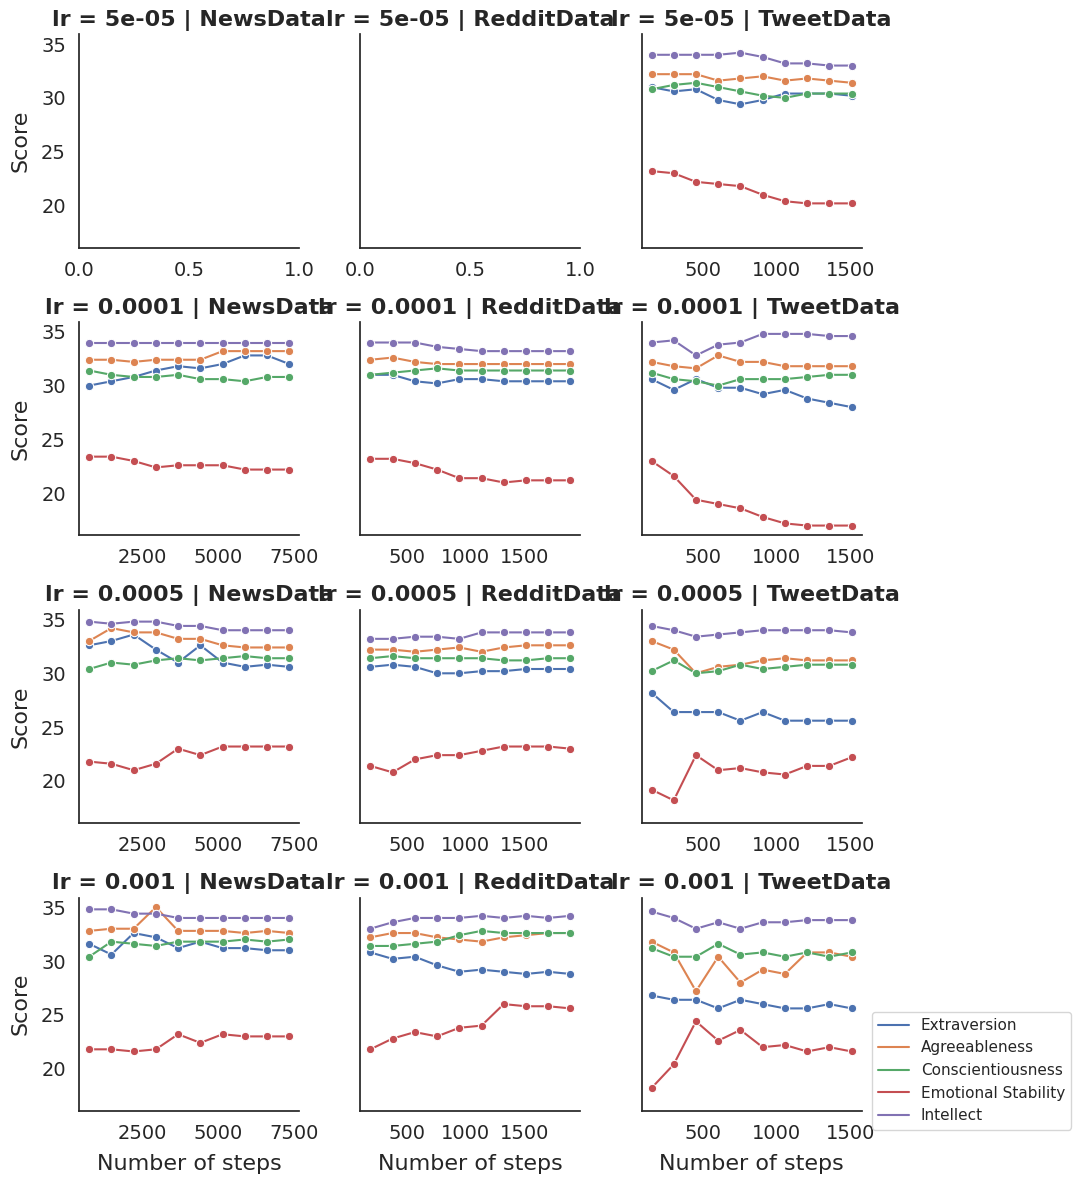

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

grid = sns.FacetGrid(
    df_test,
    col='data',
    row='lr',
    sharex=False
)

grid.map_dataframe(
    sns.lineplot,
    data=df_test,
    x='num_steps',
    y='value',
    hue='score',
    marker='o'
)

plt.legend(loc='upper center', bbox_to_anchor=(1.50, 0.50), shadow=False)

for i in range(3):
    ax = grid.axes[-1, i]
    ax.set_xlabel('Number of steps')

for i in range(4):
    ax = grid.axes[i, 0]
    ax.set_ylabel('Score')

grid.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)

plt.savefig('figs/ipip.pdf', bbox_inches='tight')

plt.show()

In [12]:
test_name = 'Sociotype'
score_names = ['Rationality', 'Extroversion', 'Sensing', 'Logical']
df_test = df_avg[df_avg['test'] == test_name]

df_test = df_test.apply(score_cols, axis=1, score_names=score_names)

df_test = df_test.melt(id_vars=['data', 'r', 'alpha', 'epochs', 'batch_size', 'lr', 'num_steps'], value_vars=score_names, var_name='score', value_name='value')

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

grid = sns.FacetGrid(
    df_test,
    col='data',
    row='lr',
    sharex=False
)

grid.map_dataframe(
    sns.lineplot,
    data=df_test,
    x='num_steps',
    y='value',
    hue='score',
    marker='o'
)

plt.legend(loc='upper center', bbox_to_anchor=(1.50, 0.50), shadow=False)

for i in range(3):
    ax = grid.axes[-1, i]
    ax.set_xlabel('Number of steps')

for i in range(4):
    ax = grid.axes[i, 0]
    ax.set_ylabel('Score')

# set y lim to 0 to 1
for ax in grid.axes.flat:
    ax.set_ylim(0, 1.1)

grid.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)

# plt.show()

plt.savefig('figs/sociotype.pdf', bbox_inches='tight')

In [14]:
test_name = 'MBTI_Extroversion'
score_names = ['Extroverted', 'Sensing', 'Thinking', 'Judging']
df_test = df_avg[df_avg['test'] == test_name]

df_test = df_test.apply(score_cols, axis=1, score_names=score_names)

df_test = df_test.melt(id_vars=['data', 'r', 'alpha', 'epochs', 'batch_size', 'lr', 'num_steps'], value_vars=score_names, var_name='score', value_name='value')

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

grid = sns.FacetGrid(
    df_test,
    col='data',
    row='lr',
    sharex=False
)

grid.map_dataframe(
    sns.lineplot,
    data=df_test,
    x='num_steps',
    y='value',
    hue='score',
    marker='o'
)

plt.legend(loc='upper center', bbox_to_anchor=(1.50, 0.50), shadow=False)

for i in range(3):
    ax = grid.axes[-1, i]
    ax.set_xlabel('Number of steps')

for i in range(4):
    ax = grid.axes[i, 0]
    ax.set_ylabel('Score')

# set y lim to 0 to 1
for ax in grid.axes.flat:
    ax.set_ylim(0, 1)

grid.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)

# plt.show()

plt.savefig('figs/mbti.pdf', bbox_inches='tight')

Explore variations in prompts for MBTI

In [16]:
def score_cols(row, score_names: list[str]):
    score = row['score']

    for i, name in enumerate(score_names):
        row[name] = score[i]
    
    return row

score_names = ['Extroverted', 'Sensing', 'Thinking', 'Judging']

df_mbti = df.apply(score_cols, axis=1, score_names=score_names)

In [17]:
display_names = {
    'personality_test': 'Personality -  1',
    'qa2': 'QA - 2',
    'personality_test_basic': 'Personality - 2',
    'basic': 'Basic',
    'qa': 'QA - 1'
}

In [20]:
from itertools import product
import seaborn as sns
from matplotlib import pyplot as plt
import random

prompts = display_names.keys()
p_results = {
    k: df_mbti[df_mbti['prompt'] == k][score_names].to_numpy()
    for k in prompts
}

def test_mse(a, b):
    return np.square(a - b).mean(axis=1).mean(axis=0)

test_matrix = np.zeros((len(prompts), len(prompts)))

prompts = sorted(list(prompts))

for (i, test_1), (j, test_2) in product(enumerate(prompts), enumerate(prompts)):
    if test_1 == test_2:
        continue
    
    test_matrix[i, j] = test_mse(p_results[test_1], p_results[test_2])

prompts = [display_names[p] for p in prompts]

sns.heatmap(
    test_matrix,
    xticklabels=prompts,
    yticklabels=prompts,
    cmap='viridis'
)

# plt.title('Similarity between different prompting methods (MSE)')
plt.xlabel('Prompt 1')
plt.ylabel('Prompt 2')

plt.savefig('figs/prompt_similarity.pdf', bbox_inches='tight')